<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# <font color='white' size='20'>**Overview**</font>

Find stuff about wine

### What are the components included in the dataset?

- **Fixed acidity:** 

    This is attributable to the non-volatile acids found in wine, such as tartaric, citric, or malic acid. These acids play a crucial role in balancing the wine's taste and imparting freshness.

- **Volatile acidity:** 

    Volatile acidity represents the portion of acidity in wine that can be detected through its aroma, in contrast to those acids that are perceptible through taste. High volatile acidity, often referred to as wine sourness, is a common wine defect.

- **Citric acid:** 

    Citric acid is an allowable additive in winemaking, regulated by OIV Resolution No. 23/2000. It serves three main purposes: adjusting wine acidity, wine fining, and filter cleaning to prevent fungal and mold contamination.

- **Residual sugar:** 

    Residual sugar refers to the grape sugar that remains unfermented and retains its sweetness in the wine.

- **Chlorides:** 

    The mineral content in wine, including chlorides, sulfates, sulfites, and metal cations (e.g., potassium, sodium, magnesium), significantly influences its taste profile, including salinity or "sapidità." These constituents are influenced by factors like climate, oenological practices, storage, and aging conditions.

- **Free sulfur dioxide and total sulfur dioxide:** 

    Sulfur dioxide, commonly referred to as SO2, is employed as a preservative in wine due to its antioxidant and antimicrobial properties. Molecular SO2 acts as a crucial antimicrobial agent, preventing spoilage caused by microorganisms, including wild yeast.

- **Density:** 

    Wine's density can either exceed or fall below that of water. It primarily depends on the concentration of alcohol and sugar. Generally, white, rosé, and red wines have lower densities at 20°C than 998.3 kg/m³.

- **pH:** 

    pH is a measure of wine's acidity level, with the ideal range falling between 2.9 and 4.2. Lower pH values indicate higher acidity, while higher pH values signify lower acidity.

- **Sulfates:** 

    Sulfates are naturally produced during yeast fermentation of wine sugars into alcohol, and the presence of sulfites in wine is negligible.

- **Alcohol:** 

    The alcohol content in wine varies based on factors such as grape variety, sugar content in the grapes, production techniques, and growing conditions. Wine alcohol content can range from 4.5% to 22%, depending on the wine category.

- **Quality:** 

    Quality is a target variable in the dataset, indicating the overall quality or rating of the wine.

<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# <font color='white' size='20'><i>**Plan**</i></font> → Acquire → Prepare → Explore → Model → Deliver

- **Notebook matched presentation (2 pts)**

Notebook was clean and relevant such that what was talked about what easy to see in the notebook, and what was in the notebook was relevant information that was included in the presentation.

- **Considered audience/setting (2 pts)**

You clearly considered the audience and setting in which the presentation was delivered. The language was professional, volume and speed of talk was appropriate, as was level of depth, and it was easy to follow you throughout the presentation

- **Conclusion with summary (2 pts)**

Your presentation concluded with a summary of what was found, recommendations, and next steps.

- **Under 5 minutes (2 pts)**

Adequate time for each section

---

### Check columns functions

<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# Plan → <font color='white' size='20'><i>**Acquire**</i></font> → Prepare → Explore → Model → Deliver

In [1]:
import wrangle as w
warnings.filterwarnings("ignore")

df = w.load_wine_data()

<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# Plan → Acquire → <font color='white' size='20'><i>**Prepare**</i></font> → Explore → Model → Deliver

- **Functions used with md documentation. (2 pts)**

You called the functions from modules that you created to wrangle data in your report, and you included, in your final notebook, a markdown cell, explaining the steps you took to prepare the data and why.

- **Sound handling of missing values (2 pts)**

You handled missing values by imputing or removing them in a logical and communicated way. You correctly handled missing values using a sound logic that was communicated via markdown documentation. You correctly used either the training data or the entire dataset to impute (given your method(s) for filling missing values).

- **Scaling performed correctly (3 pts)**

You correctly scaled your data, and used scaled data in clustering and regression.

- **Three Samples Before Exploring (3 pts)**

Your data was split into three samples before exploring the interaction of variables, imputing, scaling, or running feature elimination/selection algorithms.

- **RandomState set (1 pt)**

Your split is reproducible because you set the random state to a seed.

- **Modules with functions using docstrings. (3 pts)**

Module(s) with functions for acquiring and preparing the data are created. Functions include useful docstrings (beyond the docstrings of functions written and shared by instructors)

---

In [2]:
# Assign DF for stat testing
df = df[["volatile_acidity", "chlorides", "density", "alcohol", "quality"]]

In [3]:
# Univariate exploration (before split)
w.check_columns(df, graphs=False, reports=False)

Total rows: 6497
Total columns: 5


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,volatile_acidity,float64,187,0,0.0,"[0.7, 0.88, 0.76, 0.28, 0.66, 0.6, 0.65, 0.58,...","[0.08, 1.58, 0.3396659996921656]"
1,chlorides,float64,214,0,0.0,"[0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.0...","[0.009, 0.611, 0.05603386178236109]"
2,density,float64,998,0,0.0,"[0.9978, 0.9968, 0.997, 0.998, 0.9964, 0.9946,...","[0.98711, 1.03898, 0.9946966338309989]"
3,alcohol,float64,111,0,0.0,"[9.4, 9.8, 10.0, 9.5, 10.5, 9.2, 9.9, 9.1, 9.3...","[8.0, 14.9, 10.491800831149453]"
4,quality,int64,7,0,0.0,"[5, 6, 7, 4, 8, 3, 9]","[3.0, 9.0, 5.818377712790519]"


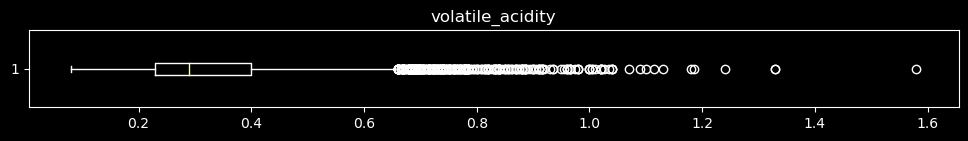

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 6120 (94.20%)
Number of results in upper quartile: 377 (5.80%)


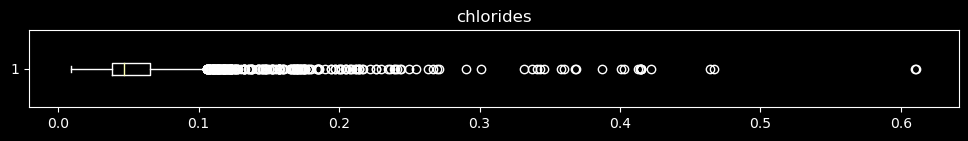

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 6211 (95.60%)
Number of results in upper quartile: 286 (4.40%)


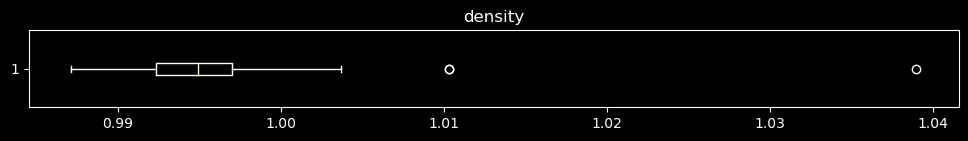

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 6494 (99.95%)
Number of results in upper quartile: 3 (0.05%)


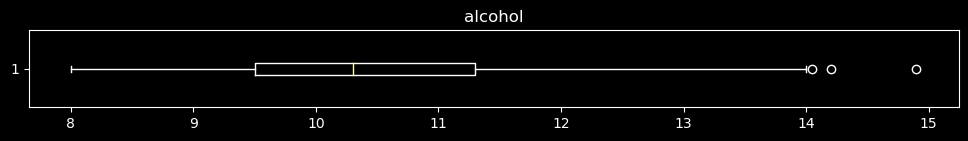

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 6494 (99.95%)
Number of results in upper quartile: 3 (0.05%)


In [4]:
w.box_plotter(df)

##### Split Data Function

In [5]:
# Split for multivariate exploration

train, validate, test = w.split_data(df, random_state=123)

train: 3897 (60% of 6497)
validate: 1300 (20% of 6497)
test: 1300 (20% of 6497)


<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# Plan → Acquire → Prepare → <font color='white' size='20'><i>**Explore**</i></font> → Model → Deliver

- **Viz's/tests wrapped in a formed Q & A (6 pts)**

You called out at least four of the questions you asked of the data and provided a clear answer using natural language in markdown cells in your final report.

- **5-7 Vizs (5 pts)**

Between five and seven visualizations included. Included visualizations should be tied to specific statements/questions and takeaways/answers (with or without a statistical test) or set the context for the target or other key variable. Including more than seven visualizations in the final report typically indicates some are extraneous.

- **2 accurate tests included (5 pts)**

You correctly utilize at least two statistical tests (correct variables, conclusions drawn, no assumptions violated, and proper conclusions reached).

- **3 clustering models + explored (6 pts)**

You developed 3 clustering models and explored the relationship of those clusters to the target variable.

- **Analysis Summary + Features (6 pts)**

Summary of analysis includes key takeaways from the questions answered in explore, and documentation of the features that will be tried out in modeling and why, and which features will not move forward and why. Well done!

---

### Graphs

In [6]:
# Test normality and equal variance using Shapiro and Levene Tests

# If Shapiro's P value > 0.05, data is normal
# If Levene's P value > 0.05, data has equal variance

w.test_normality_and_variance(train, target="quality")

volatile_acidity: Not normal
volatile_acidity: Not equal variance

chlorides: Not normal
chlorides: Not equal variance

density: Not normal
density: Not equal variance

alcohol: Not normal
alcohol: Not equal variance



### QUESTIONS: 

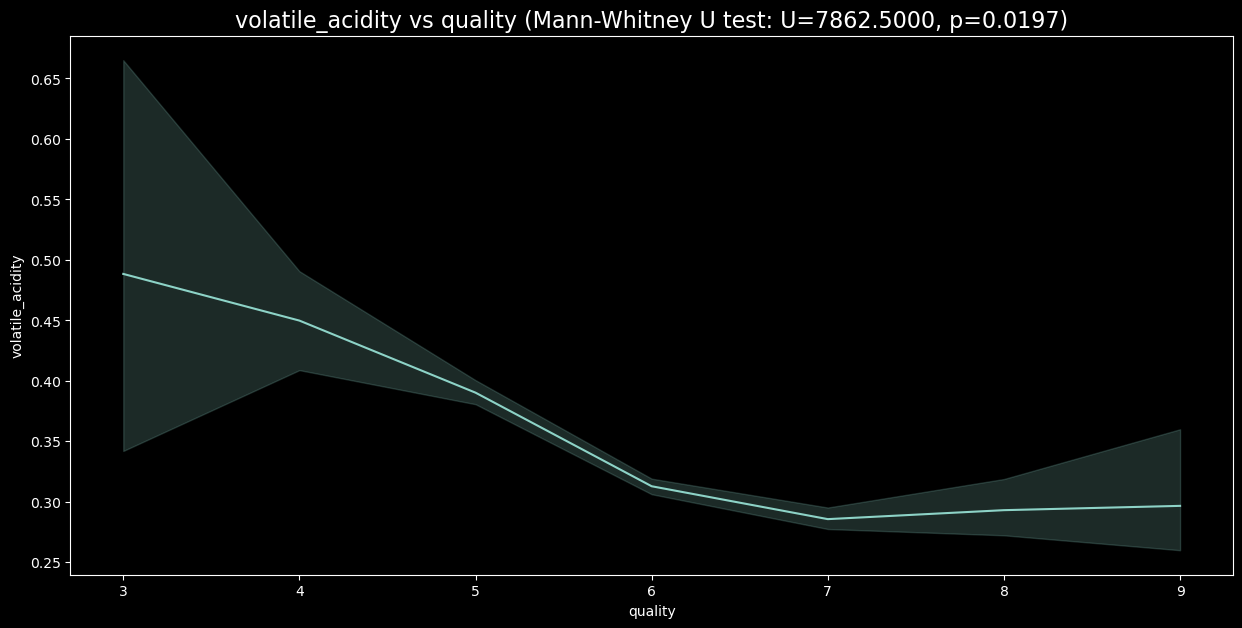

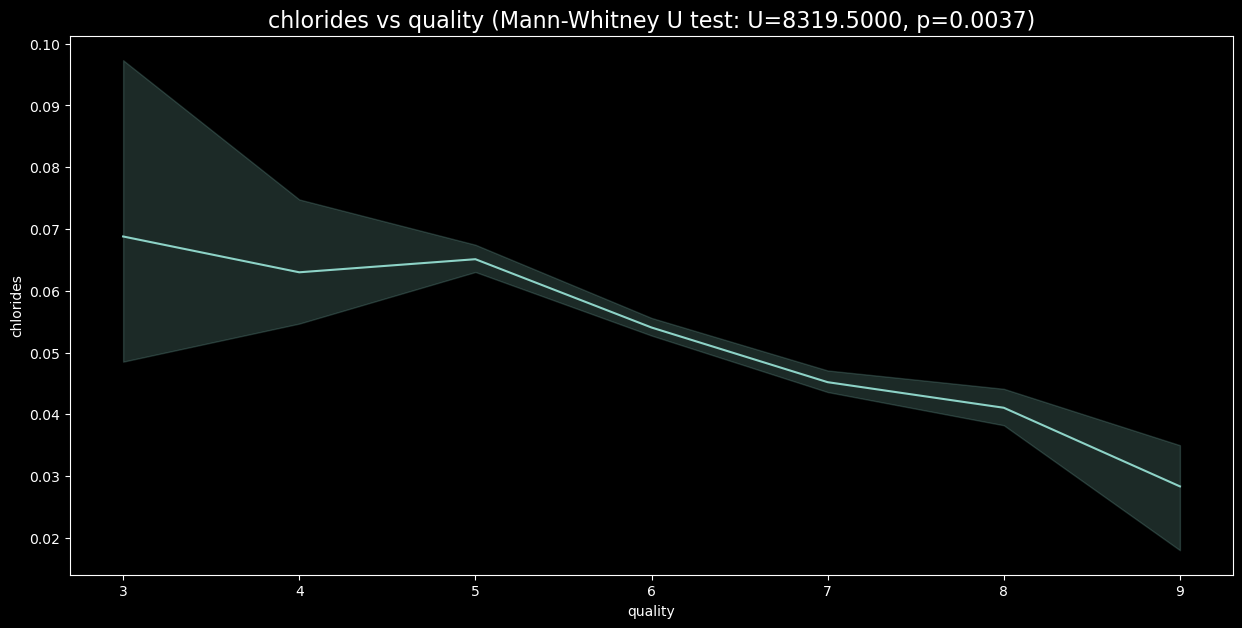

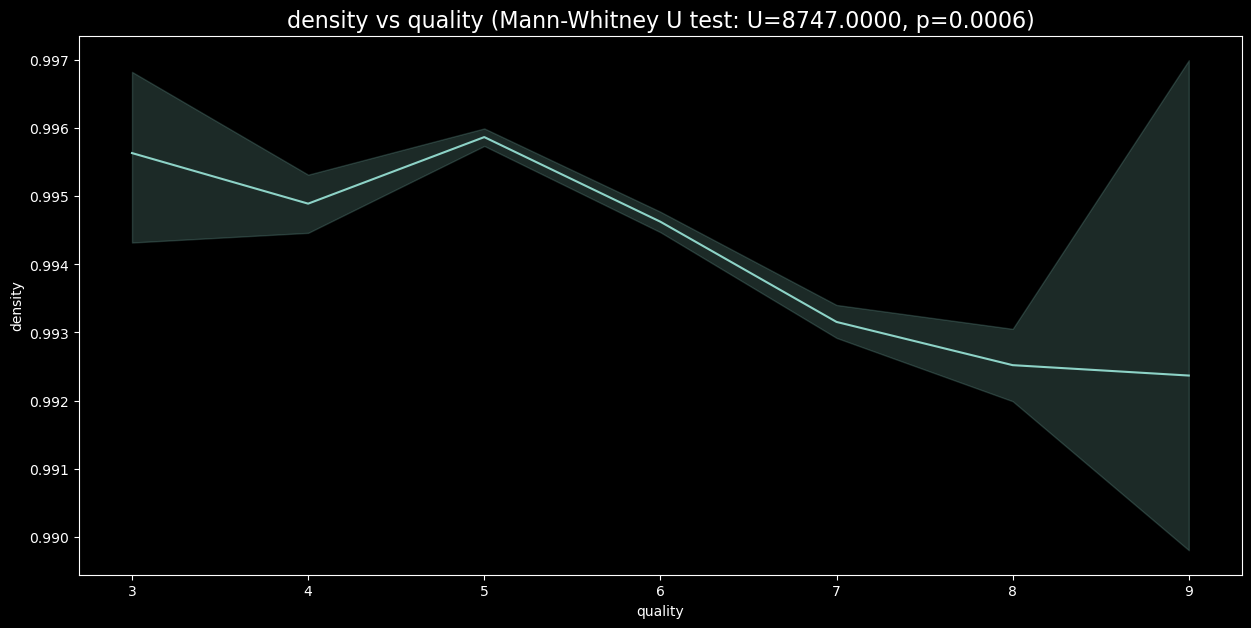

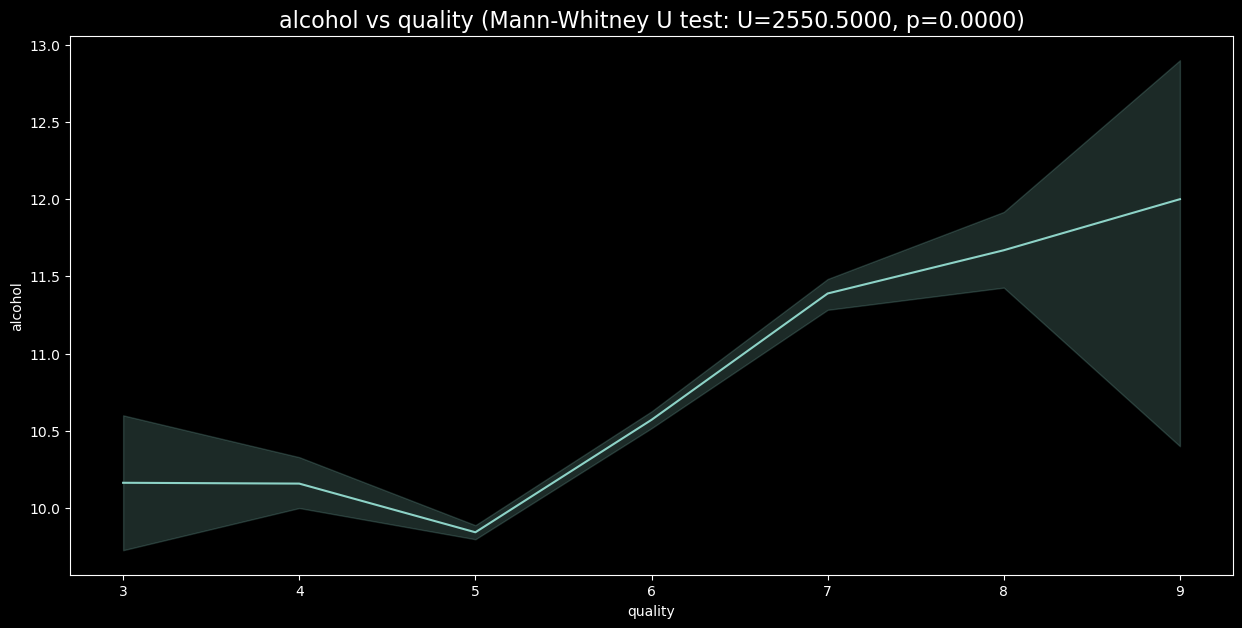

In [7]:
# Make a line plot for each column compared against quality, and stat test using Mann Whitney

w.plot_quality_vs_feature(train, "quality")

## Findings:

### Split and Scale before KMeans

#### Split

In [18]:
# We'll do exploration and train our model on the train data
X_train = train.drop(columns=["quality"])
y_train = train["quality"]

# We tune our model on validate, since it will be out-of-sample until we use it.
X_validate = validate.drop(columns=["quality"])
y_validate = validate["quality"]

# Keep the test separate, for our final out-of-sample dataset, to see how well our tuned model performs on new data.
X_test = test.drop(columns=["quality"])
y_test = test["quality"]

### Scale

In [19]:
# Scale X sets using MinMax

X_train_scaled, X_validate_scaled, X_test_scaled = mm_scale_data(X_train, X_validate, X_test)

### K Means Elbow for Feature Engineering

The silhouette score from SKLearn is a metric used to evaluate the quality of clustering. It measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster and poorly-matched to neighboring clusters, and a score of -1 indicates the opposite.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/an

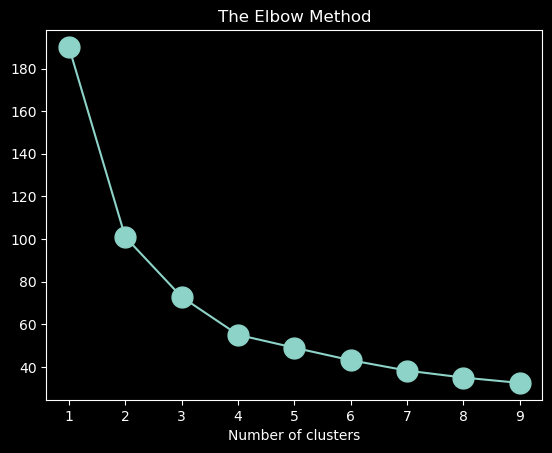

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/an

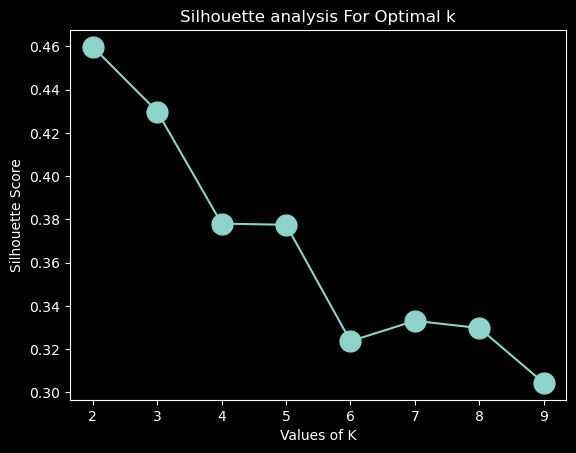

In [23]:
w.plot_elbow_and_silhouette(X_train_scaled)

<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# Plan → Acquire → Prepare → Explore → <font color='white' size='20'><i>**Model**</i></font> → Deliver

- **Baseline predictions evaluated (2 pt)**

You made baseline predictions and evaluated the performance to measure your models against. Establishing a baseline prediction method that uses no features because it tells you if having a model has any value. If any model you build does not perform as well as a baseline that uses no features, then your features are not significant drivers of the outcome.

- **All models evaluated on train (2 pt)**

Models are always evaluated on train because it is a sample of data we have to see how the model performs. We should never skip straight to validate. We would be missing out on valuable observations.

- **Top models evaluated on validate (2 pt)**

Your top models are evaluated with the validate sample to check for overfitting.

**Eval metric(s) is clear and proper (2 pts)**

You identified what metric(s) you used to evaluate your models and why. If you considered multiple metrics, you explained how you selected a metric when one was better for model A and another is better for model B.

- **Final model evaluated on test (2 pts)**

Top model evaluated on test: we evaluate one last time on test in order to provide an estimate as to how we expect the model to perform in the future, in production, on data it has never seen.

- **Developed 4+ Unique Models (3 pts)**

You developed at least 4 unique models. Models can be different based on the features used, the hyperparameters selected, and/or the algorithm used to fit the data

---

### Model Loops

### Hyperparamter Tuning

In [27]:
scaler_names = ["robust", "minmax", "standard"]
n_clusters_list = [3, 4, 5]

rfc_scores = {}

for scaler_name in scaler_names:
    for n_clusters in n_clusters_list:
        key = f"{scaler_name}_{n_clusters}"
        rfc_scores[key] = w.hyper_tuning(X_train, y_train, X_validate, y_validate, scaler_name=scaler_name, n_clusters=n_clusters)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedM

In [47]:
rfc_scores = w.merge_and_filter_dataframes()

In [48]:
rfc_scores

,acc_train,acc_val,acc_diff,scaler,clusters,prec_train,prec_val,recall_train,recall_val,f1_train,f1_val,supp_train,supp_val
Hyperparameters,,,,,,,,,,,,,
"(100, 6, 2, 1)",0.613,0.558,0.054,standard,3,0.649719,0.521133,0.612779,0.558462,0.581554,0.522027,3897,1300
"(100, 6, 10, 4)",0.597,0.555,0.041,minmax,3,0.575306,0.518668,0.596613,0.555385,0.563541,0.518579,3897,1300
"(100, 6, 2, 1)",0.603,0.554,0.049,minmax,3,0.640082,0.515137,0.602515,0.553846,0.569402,0.516263,3897,1300
"(100, 6, 2, 2)",0.608,0.554,0.054,standard,5,0.635085,0.545843,0.607904,0.553846,0.577823,0.519275,3897,1300
"(100, 6, 5, 1)",0.609,0.553,0.056,standard,3,0.605666,0.512127,0.608673,0.553077,0.575102,0.513944,3897,1300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(300, 3, 2, 2)",0.543,0.528,0.016,standard,3,0.521647,0.49505,0.543238,0.527692,0.494412,0.479148,3897,1300
"(100, 3, 2, 1)",0.545,0.528,0.016,robust,3,0.51708,0.492233,0.544778,0.528462,0.498361,0.482702,3897,1300
"(100, 3, 2, 2)",0.544,0.527,0.017,standard,3,0.52044,0.494234,0.543752,0.526923,0.495008,0.47777,3897,1300


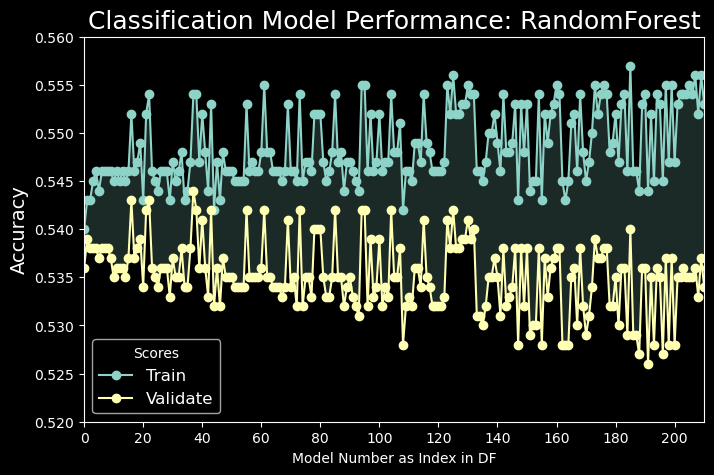

In [52]:
w.plot_rfc_scores(rfc_scores)

### Test Model

In [54]:
w.cluster_and_model_test(
    X_train, y_train, X_test, y_test, scaler="standard", n_clusters=5, model="rfc"
)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedM

,acc_train,acc_test,scaler,clusters,prec_train,prec_test,recall_train,recall_test,f1_train,f1_test,supp_train,supp_test,acc_validate
Model,,,,,,,,,,,,,
RandomForestClassifier(max_depth=6),0.613805,0.555385,standard,5,0.649823,0.526182,0.613805,0.555385,0.581708,0.512532,3897,1300,NaN
Baseline,0.33282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.33282


<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# Plan → Acquire → Prepare → Explore → Model → <font color='white' size='20'><i>**Deliver**</i></font>

- **Adequate comments (6 pts)**

Your code contains code comments that are helpful to the reader in understanding what your blocks/lines of code are doing.

- **Adequate md documentation (6 pts)**

Notebook contains adequate markdown that documents your thought process, navigating through the pipeline. This helps your reader not get lost in the details.

- **Includes summary (2 pts)**

Your conclusion summary addresses the questions you raised in the opening of the project, which we would want to see at the end of every report notebook. Ideally, when the deliverable is a report such as this, the summary should tie together your analysis, the drivers of the outcome, and how you would expect your ML model to perform in the future on unseen data, in layman's terms.

- **Includes recommendations (2 pts)**

In addition to your summary, you included actionable recommendations based on your insights and analysis to your simulated audience, or someone who would find this information valuable. Your recommendations were not about what to do differently with the data, but instead are based on the business or domain you are studying. Nice work.

- **Includes next steps (2 pts)**

Your conclusion includes next steps from a data science perspective that will assist in improving your research. Ideally, if you talk about trying more algorithms to improve performance, think about why you need to improve performance. And if the business calls for it, remember the best way to improve performance is to have better predictors/features. If you talk about gathering more data, being specific about what data you think will help you understand the problem better and why is the way to go!

- **No Errors (5 pts)**

Your final notebook runs without error.

---

<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

<font color='white' size='20'><i>**Markdown**</i>

- **Includes the project 'How' (2 pts)**

Your readme includes a project plan which helps guide both the user and yourself through the different stages of the pipeline and steps you took to get to your conclusion

- **Includes complete data dictionary (2 pts)**

Your readme includes a complete and accurate data dictionary

- **Goals include what and why (2 pts)**

You stated clear and concise project goals and included the 'so what'.

- **Complete instructions to reproduce (2 pts)**

Reproducible with ease!

- **Project description provides context. (2 pts)**

Project description provides context and explains the 'whys' to your project. It is NOT a copy of the class project spec.

- **Initial questions, areas of focus for exploration are discussed (2 pts)**

In your readme, you discussed the initial questions and focus you are going into the analysis with.

<div style="background-color: #212946; padding: 10px; color: #F62196; text-align: center;">

#### Codeup Project
***
</div>

<div style="background-color: #212946; padding: 10px; text-align: center; color: #18C0C4;">

<br>

# **Project Telco** 
<br>

</div>

## Learn to Discern What Turns Customers to Churn

- Discover drivers of churn of Telco customers

- Use drivers to develop a machine learning models to identify drivers of churn

- Churn as a customer ending their contract or not renewing their contract with Telco

### Project Description

Telco, a telecommunications enterprise, provides a wide array of services catering to a diverse clientele. This endeavor delves into the exploration of distinct elements influencing customer churn. The goal is to ascertain whether any of these factors amplify or diminish the probability of customers discontinuing their services.

### Project Goal

- Identify the drivers of churn among Telco customers.

- Develop a machine learning model to classify customer churn, distinguishing between contract renewals and contract terminations.

- Enhance our understanding of which customer attributes contribute to or mitigate customer churn.

### Initial Thoughts

I hypothesize that the drivers of churn will likely involve dissatisfied customers. Specific services or the lack thereof might be influencing customers to churn. 

## The Plan

1. **Data Acquisition**

   - Obtain data from the Codeup MySQL Database.

2. **Data Preparation**

   - Create new engineered columns from the existing data.

3. **Data Exploration**

   - Explore the data to identify potential drivers of churn by answering initial questions:
     - Is churn independent from payment type?
     - Is churn independent from internet service type?
     - Is churn independent from paperless billing?
     - Are there variations in churn based on monthly charges?

4. **Model Development**

   - Utilize the insights gained from the exploration to build predictive models.
   - Evaluate model performance on training and validation data.
   - Select the best-performing model based on accuracy.
   - Validate the chosen model using the test data.

5. **Conclusion Drawing**

   - Summarize the findings and insights.

## Data Dictionary (Exploration)

| Feature               | Values                      | Definition                            |
| :-------------------- | --------------------------- | :-------------------------------------|
| *index:* customer_id   | Alpha-numeric              | Unique ID for each customer           |
| mailed_check_payment   | True=1/False=0             | Whether customer is/has feature name  |
| e_check_payment        | True=1/False=0             | Whether customer is/has feature name  |
| credit_card_payment    | True=1/False=0             | Whether customer is/has feature name  |
| bank_transfer_payment  | True=1/False=0             | Whether customer is/has feature name  |
| two_year_contact       | True=1/False=0             | Whether customer is/has feature name  |
| one_year_contract      | True=1/False=0             | Whether customer is/has feature name  |
| internet_service_type  | True=1/False=0             | Whether customer is/has feature name  |
| month_to_month_contract| True=1/False=0             | Whether customer is/has feature name  |
| automatic_payments     | True=1/False=0             | Whether customer is/has feature name  |
| churn (target)         | True=1/False=0             | Whether customer is/has feature name  |
| dsl_internet           | True=1/False=0             | Whether customer is/has feature name  |
| paperless_billing      | True=1/False=0             | Whether customer is/has feature name  |
| fiber_optic_internet   | True=1/False=0             | Whether customer is/has feature name  |
| streaming_tv           | True=1/False=0             | Whether customer is/has feature name  |
| tech_support           | True=1/False=0             | Whether customer is/has feature name  |
| device_protection      | True=1/False=0             | Whether customer is/has feature name  |
| online_backup          | True=1/False=0             | Whether customer is/has feature name  |
| online_security        | True=1/False=0             | Whether customer is/has feature name  |
| multiple_lines         | True=1/False=0             | Whether customer is/has feature name  |
| phone_service          | True=1/False=0             | Whether customer is/has feature name  |
| kids                   | True=1/False=0             | Whether customer is/has feature name  |
| married                | True=1/False=0             | Whether customer is/has feature name  |
| senior_citizen         | True=1/False=0             | Whether customer is/has feature name  |
| streaming_movies       | True=1/False=0             | Whether customer is/has feature name  |
| tenure_years           | Numeric Normalized (0 - 1) | Tenure normalized with MinMaxScaler() |
| total_add_ons	       | Numeric Normalized (0 - 1) | Add ons normalized with MinMaxScaler()|
| tenure_months          | Numeric Normalized (0 - 1) | Tenure normalized with MinMaxScaler() |
| monthly_charges        | Numeric Normalized (0 - 1) | Charges normalized with MinMaxScaler()|
| total_charges          | Numeric Normalized (0 - 1) | Charges normalized with MinMaxScaler()|

## Steps to Reproduce

1. Clone this repository.

2. If you have access to the Codeup MySQL DB:
   - Save **env.py** in the repository with `user`, `password`, and `host` variables.
   - Ensure the **env.py** has the appropriate database connection.
   - RandomState 123 is predefined in the functions
   - Run the notebook.

3. If you don't have access:
   - Request access from Codeup.
   - Follow step 2 after obtaining access.

# Conclusions

### Takeaways and Key Findings

- Customers without tech support are churning more than those without
- Payment type, especially electronic check, is a significant driver of churn.
- The influence of fiber optic internet service on churn is surprising given its high speed.
- Paperless billing increases churn, with many churn cases having it enabled.
- Churn rates tend to rise with higher monthly charges.

### Recommendations

- Investigate and address issues related to electronic check payments.
- Analyze potential problems with fiber optic internet service.
- Offer tech support for free or cheap if it means retaining customers.

### Next Steps

- Given more time, delve into the reasons behind the high monthly charges contributing to customer churn.
- Tune the hyperparameters to potentially find a better tuned model
